In [3]:
%matplotlib inline  
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt



## Parte 1
1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.
2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.
3. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch

In [4]:
imagen_orig = cv.imread('./material/CoordCrom_1.png')


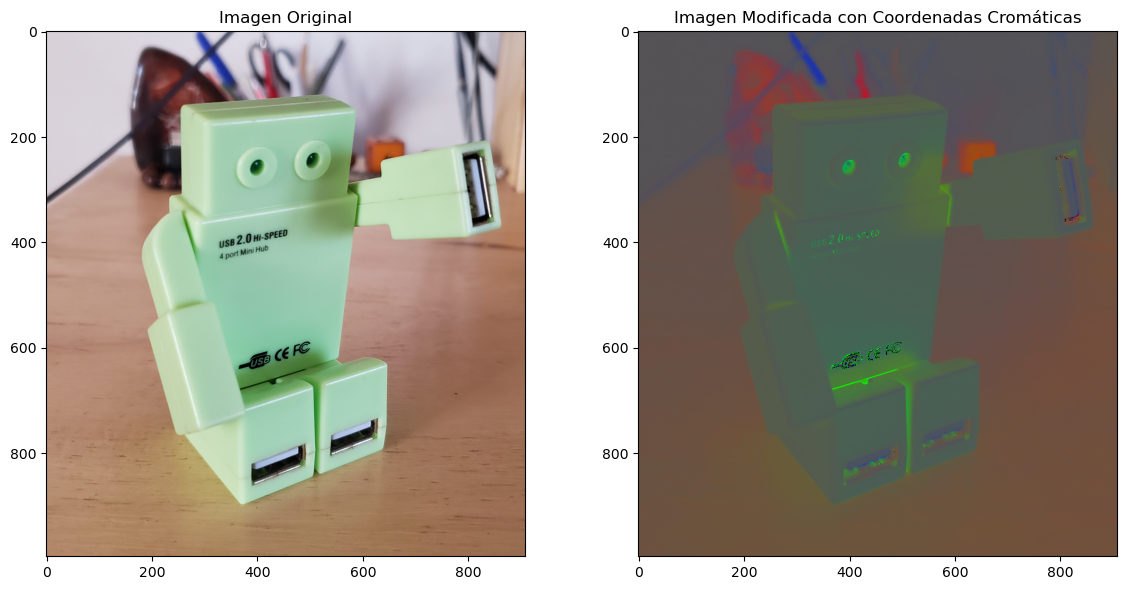

In [13]:
# Parte 1 - Punto 1
def calcular_coordenadas_cromaticidad(imagen):
    imagen_rgb = cv.cvtColor(imagen, cv.COLOR_BGR2RGB)
    R = imagen_rgb[:, :, 0].astype(float)
    G = imagen_rgb[:, :, 1].astype(float)
    B = imagen_rgb[:, :, 2].astype(float)
    suma_rgb = R + G + B
    r = np.divide(R,suma_rgb,out=np.zeros_like(suma_rgb), where=(R != 0))
    g = np.divide(G, suma_rgb,out=np.zeros_like(suma_rgb), where=(G != 0))
    b = np.divide(B, suma_rgb,out=np.zeros_like(suma_rgb), where=(B != 0))
    return r, g, b


coordenadas_cromaticidad_r, coordenadas_cromaticidad_g,coordenadas_cromaticidad_b  = calcular_coordenadas_cromaticidad(imagen_orig)

imagen_modificada = np.zeros_like(imagen_orig)
imagen_modificada[:, :, 0] = coordenadas_cromaticidad_r * 255  
imagen_modificada[:, :, 1] = coordenadas_cromaticidad_g * 255  
imagen_modificada[:, :, 2] = coordenadas_cromaticidad_b * 255  
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(imagen_orig, cv.COLOR_BGR2RGB))
plt.title('Imagen Original')

plt.subplot(1, 2, 2)
plt.imshow(imagen_modificada.astype(np.uint8))
plt.title('Imagen Modificada con Coordenadas Cromáticas')


plt.tight_layout()
plt.show()



In [35]:
# Parte 1 - Punto 2
def white_patch(image, white_point):
    B, G, R = cv.split(image)

    gain_factor_r = white_point[0]/np.max(R)
    gain_factor_g = white_point[1]/np.max(G)
    gain_factor_b = white_point[2]/np.max(B)
    
    corrected_r = np.clip(R * gain_factor_r, 0, 255).astype(np.uint8)
    corrected_g = np.clip(G * gain_factor_g, 0, 255).astype(np.uint8)
    corrected_b = np.clip(B * gain_factor_b, 0, 255).astype(np.uint8)

    corrected_image = cv.merge((corrected_b, corrected_g, corrected_r))

    return corrected_image


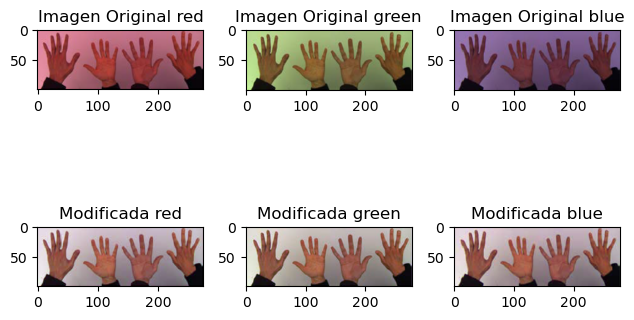

In [36]:
punto_blanco = [255.0, 255.0, 255.0]

imagen_original_r = cv.imread('./material/test_red.png')
imagen_modificada_r = white_patch(imagen_original_r, punto_blanco)

#plt.figure(figsize=(10, 5))
plt.subplot(2, 3, 1)
plt.imshow(cv.cvtColor(imagen_original_r, cv.COLOR_BGR2RGB))
plt.title('Imagen Original red')


imagen_original_g = cv.imread('./material/test_green.png')
imagen_modificada_g = white_patch(imagen_original_g, punto_blanco)

#plt.figure(figsize=(10, 5))
plt.subplot(2, 3, 2)
plt.imshow(cv.cvtColor(imagen_original_g, cv.COLOR_BGR2RGB))
plt.title('Imagen Original green')


imagen_original_b = cv.imread('./material/test_blue.png')
imagen_modificada_b = white_patch(imagen_original_b, punto_blanco)

plt.subplot(2, 3, 3)
plt.imshow(cv.cvtColor(imagen_original_b, cv.COLOR_BGR2RGB))
plt.title('Imagen Original blue')

plt.subplot(2, 3, 4)
plt.imshow(cv.cvtColor(imagen_modificada_r.astype(np.uint8), cv.COLOR_BGR2RGB))
plt.title('Modificada red')

plt.subplot(2, 3, 5)
plt.imshow(cv.cvtColor(imagen_modificada_g.astype(np.uint8), cv.COLOR_BGR2RGB))
plt.title('Modificada green')

plt.subplot(2, 3, 6)
plt.imshow(cv.cvtColor(imagen_modificada_b.astype(np.uint8), cv.COLOR_BGR2RGB))
plt.title('Modificada blue')


plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Modificada wp blue')

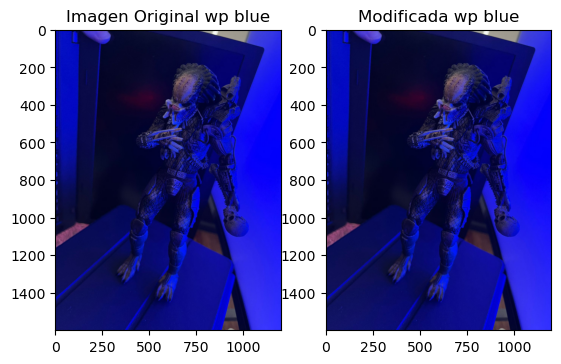

In [37]:
imagen_original_wpb = cv.imread('./material/wp_blue.jpg')
imagen_modificada_wpb = white_patch(imagen_original_wpb, punto_blanco)

#plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(imagen_original_wpb, cv.COLOR_BGR2RGB))
plt.title('Imagen Original wp blue')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(imagen_modificada_wpb.astype(np.uint8), cv.COLOR_BGR2RGB))
plt.title('Modificada wp blue')

In [38]:
B, G, R = cv.split(imagen_original_wpb)

print(f'Máximo valor pixel canal Red: {np.max(R)}')
print(f'Máximo valor pixel canal Green: {np.max(G)}')
print(f'Máximo valor pixel canal Blue: {np.max(B)}')

Máximo valor pixel canal Red: 255
Máximo valor pixel canal Green: 255
Máximo valor pixel canal Blue: 255


Text(0.5, 1.0, 'Modificada wp green')

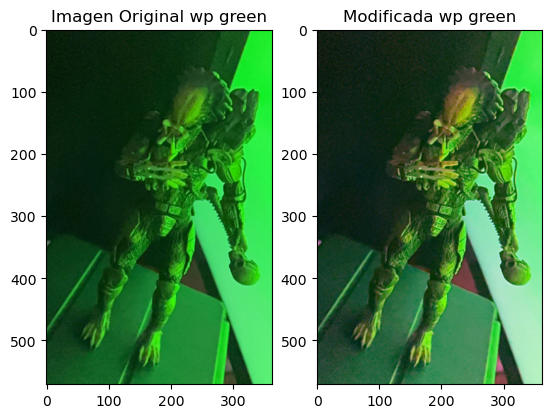

In [39]:
imagen_original_wpg = cv.imread('./material/wp_green.png')
imagen_modificada_wpg = white_patch(imagen_original_wpg, punto_blanco)

#plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(imagen_original_wpg, cv.COLOR_BGR2RGB))
plt.title('Imagen Original wp green')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(imagen_modificada_wpg.astype(np.uint8), cv.COLOR_BGR2RGB))
plt.title('Modificada wp green')

Text(0.5, 1.0, 'Modificada wp green2')

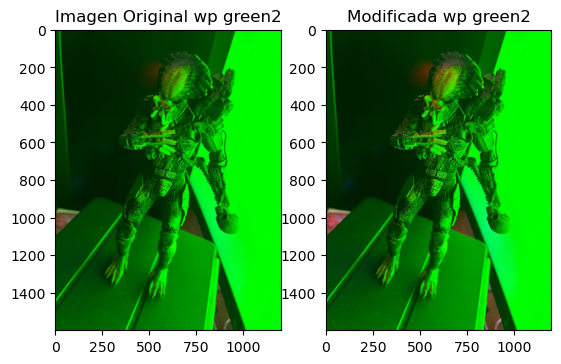

In [40]:
imagen_original_wpg2 = cv.imread('./material/wp_green2.jpg')
imagen_modificada_wpg2 = white_patch(imagen_original_wpg2, punto_blanco)

#plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(imagen_original_wpg2, cv.COLOR_BGR2RGB))
plt.title('Imagen Original wp green2')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(imagen_modificada_wpg2.astype(np.uint8), cv.COLOR_BGR2RGB))
plt.title('Modificada wp green2')

Text(0.5, 1.0, 'Modificada wp red')

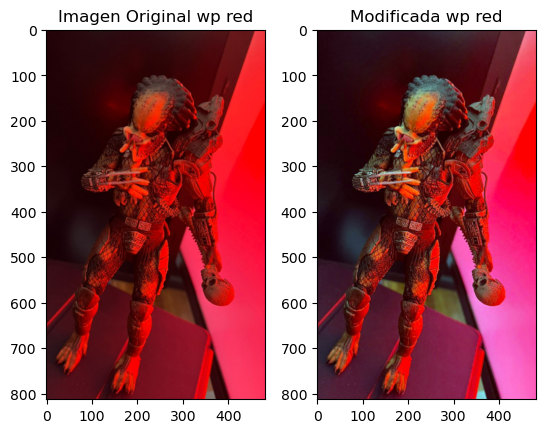

In [41]:
imagen_original_wpr = cv.imread('./material/wp_red.png')
imagen_modificada_wpr = white_patch(imagen_original_wpr, punto_blanco)

#plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(imagen_original_wpr, cv.COLOR_BGR2RGB))
plt.title('Imagen Original wp red')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(imagen_modificada_wpr.astype(np.uint8), cv.COLOR_BGR2RGB))
plt.title('Modificada wp red')

Text(0.5, 1.0, 'Modificada wp red2')

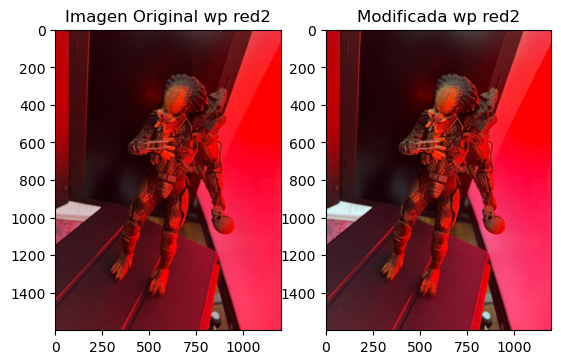

In [42]:
imagen_original_wpr2 = cv.imread('./material/wp_red2.jpg')
imagen_modificada_wpr2 = white_patch(imagen_original_wpr2, punto_blanco)

#plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(imagen_original_wpr2, cv.COLOR_BGR2RGB))
plt.title('Imagen Original wp red2')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(imagen_modificada_wpr2.astype(np.uint8), cv.COLOR_BGR2RGB))
plt.title('Modificada wp red2')

##### Parte 1 - Punto 3  
Al seleccionar [255,255,255] como punto blanco, si una imagen tiene como máximo valor de pixel 255, para los tres canales (como en el caso de wp_blue.jpg), al aplicar el algoritmo White Patch, se obtiene la imagen original. En ese caso se busca un percentil, en lugar de usar el máximo.


Una elección incorrecta del punto blanco en el algoritmo White Patch puede provocar resultados imprecisos y afectar negativamente la calidad visual de la imagen corregida. Las posibles fallas incluyen pérdida de detalles, distorsión de colores y una reproducción general insatisfactoria del equilibrio de blancos. 

El algoritmo White Patch asume que el punto blanco seleccionado es representativo de la iluminación global de la escena. Entonces, si hay variaciones significativas en la iluminación, aplicar White Patch podría resultar en correcciones de color inconsistentes.




## Parte 2:
1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas.
2. Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si.
Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes,
considera que puede ser de utilidad tomar como ‘features’ a los histogramas?
3. Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los
elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes
separadas.

#### img1_tp.png  
Parte 2 - Puntos 1 y 2

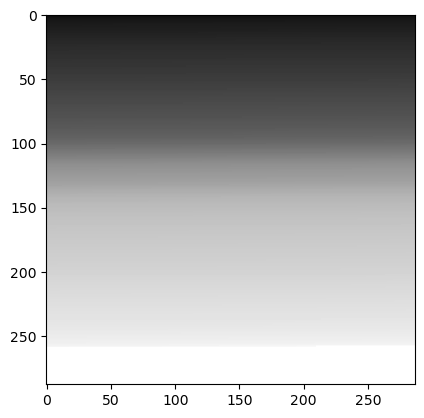

In [43]:
image1 = cv.imread('./material/img1_tp.png', cv.IMREAD_GRAYSCALE)
plt.figure()
plt.imshow(image1, cmap='gray')
plt.show()

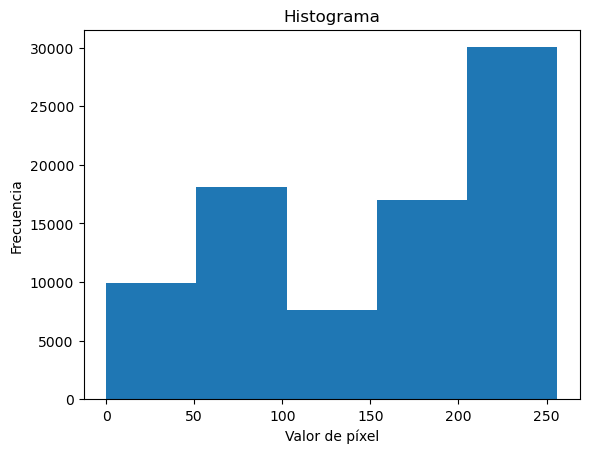

In [44]:

hist = cv.calcHist([image1], [0], None, [256], [0, 256])

data_range = np.ptp(image1)  
iqr = np.percentile(image1, 75) - np.percentile(image1, 25)  
bin_width = 2.0 * iqr / np.power(len(image1), 1/3)  
num_bins = int(data_range / bin_width)

hist, bins = np.histogram(image1, bins=num_bins, range=(0, 256))

plt.hist(image1.ravel(), bins=num_bins, range=(0, 256))
plt.xlabel('Valor de píxel')
plt.ylabel('Frecuencia')
plt.title('Histograma')
plt.show()

#### img2_tp.png  
Parte 2 - Puntos 1 y 2

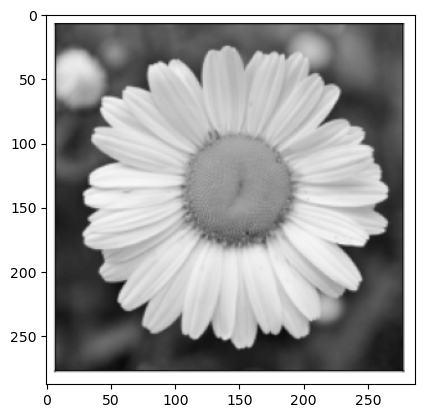

In [45]:
image2 = cv.imread('./material/img2_tp.png', cv.IMREAD_GRAYSCALE)
plt.figure()
plt.imshow(image2, cmap='gray')
plt.show()

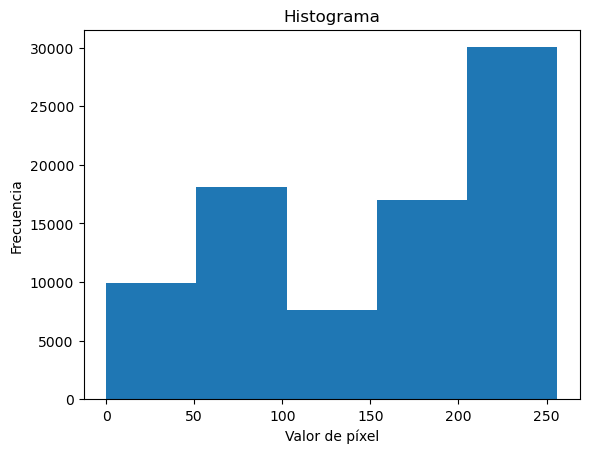

In [46]:

hist = cv.calcHist([image2], [0], None, [256], [0, 256])

# Encuentra el número óptimo de bins usando la regla de Freedman-Diaconis
data_range = np.ptp(image2) 
iqr = np.percentile(image2, 75) - np.percentile(image2, 25)  
bin_width = 2.0 * iqr / np.power(len(image2), 1/3)  
num_bins = int(data_range / bin_width)

hist, bins = np.histogram(image2, bins=num_bins, range=(0, 256))

plt.hist(image2.ravel(), bins=num_bins, range=(0, 256))
plt.xlabel('Valor de píxel')
plt.ylabel('Frecuencia')
plt.title('Histograma')
plt.show()


### Tomando cantidad de bins igual a la cantidad de valores disponibles

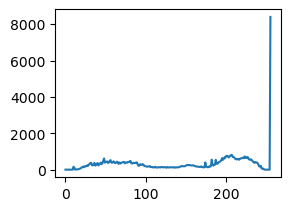

In [47]:
# Imagen 1
hist2,bins2 = np.histogram(image2.ravel(),256,[0,256])
ax4=plt.subplot(224)
ax4.plot(hist2)

plt.show()

In [48]:
hist2

array([   0,    0,    1,    1,    2,    0,    0,    0,    0,    0,  159,
        110,    3,   10,   16,   17,   20,   41,   58,   71,  119,  131,
        176,  130,  163,  204,  189,  231,  209,  263,  322,  360,  377,
        234,  235,  284,  368,  221,  249,  324,  361,  228,  312,  329,
        384,  304,  356,  482,  614,  383,  429,  418,  454,  365,  398,
        474,  524,  394,  378,  426,  454,  375,  358,  390,  438,  411,
        322,  391,  337,  355,  391,  399,  416,  426,  346,  388,  402,
        385,  418,  419,  464,  474,  343,  341,  359,  377,  360,  370,
        394,  393,  269,  209,  236,  298,  257,  273,  302,  273,  204,
        191,  187,  163,  164,  182,  174,  194,  149,  139,  148,  120,
        129,  125,  157,  117,  115,  120,  134,  135,  116,  141,  141,
        139,  124,  129,  138,  115,  111,  145,  124,  117,  128,  136,
        128,  122,  117,  139,  120,  108,  130,  130,  123,  133,  151,
        173,  174,  203,  186,  183,  186,  197,  2

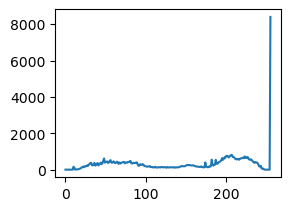

In [49]:
# Imagen 2
hist3,bins3 = np.histogram(image1.ravel(),256,[0,256])
ax4=plt.subplot(224)
ax4.plot(hist3)

plt.show()

In [50]:
hist3

array([   0,    0,    1,    1,    2,    0,    0,    0,    0,    0,  159,
        110,    3,   10,   16,   17,   20,   41,   58,   71,  119,  131,
        176,  130,  163,  204,  189,  231,  209,  263,  322,  360,  377,
        234,  235,  284,  368,  221,  249,  324,  361,  228,  312,  329,
        384,  304,  356,  482,  614,  383,  429,  418,  454,  365,  398,
        474,  524,  394,  378,  426,  454,  375,  358,  390,  438,  411,
        322,  391,  337,  355,  391,  399,  416,  426,  346,  388,  402,
        385,  418,  419,  464,  474,  343,  341,  359,  377,  360,  370,
        394,  393,  269,  209,  236,  298,  257,  273,  302,  273,  204,
        191,  187,  163,  164,  182,  174,  194,  149,  139,  148,  120,
        129,  125,  157,  117,  115,  120,  134,  135,  116,  141,  141,
        139,  124,  129,  138,  115,  111,  145,  124,  117,  128,  136,
        128,  122,  117,  139,  120,  108,  130,  130,  123,  133,  151,
        173,  174,  203,  186,  183,  186,  197,  2

In [51]:
print((hist2 == hist3).all())

True


##### Conclusión: Los histogramas son idénticos para ambas imágenes. No los usaría como features para entrenar un modelo de clasificación porque no aportan información útil para tal objetivo.

## Segmentación

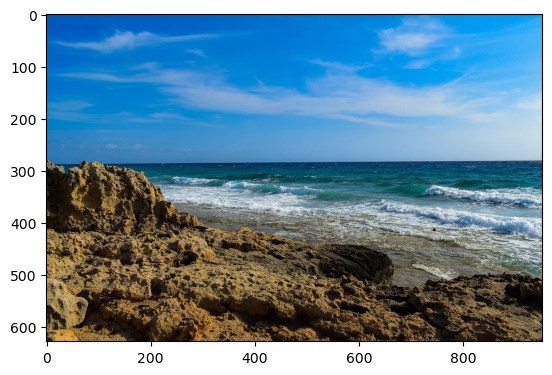

In [52]:
img_color = cv.imread('./material/segmentacion.png')
imgRGB = cv.cvtColor(img_color, cv.COLOR_BGR2RGB)

plt.figure(1)
plt.imshow(imgRGB)
plt.show()

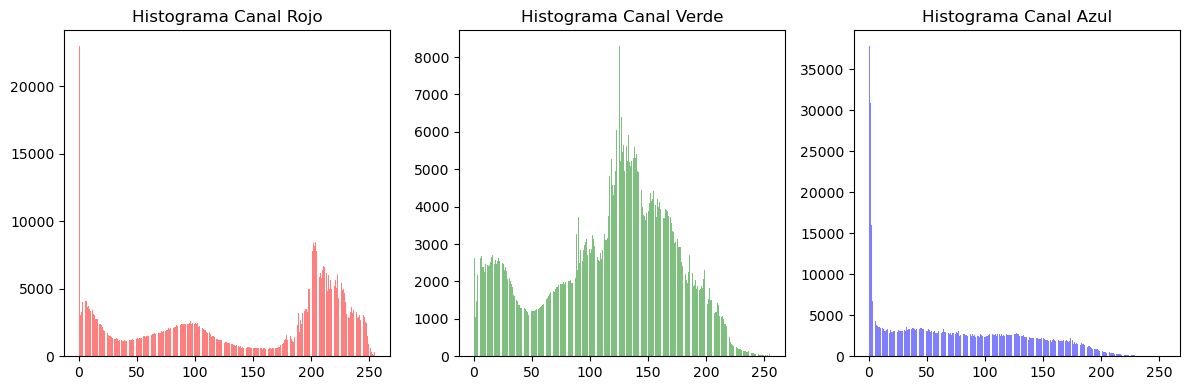

In [53]:
canal_r, canal_g, canal_b = cv.split(img_color)

plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.hist(canal_r.ravel(), bins=256, color='red', alpha=0.5, rwidth=0.8)
plt.title('Histograma Canal Rojo')

plt.subplot(132)
plt.hist(canal_g.ravel(), bins=256, color='green', alpha=0.5, rwidth=0.8)
plt.title('Histograma Canal Verde')

plt.subplot(133)
plt.hist(canal_b.ravel(), bins=256, color='blue', alpha=0.5, rwidth=0.8)
plt.title('Histograma Canal Azul')

plt.tight_layout()
plt.show()


Se observan picos para el valor 0, tanto en el canal rojo (cercano a 20000), como en el canal azul (cercano a 35000). Para el canal verde, el pico está en el centro (cercano a 8000).
Estos valores pueden indicar que la imagen tiene áreas con sombras, y que los colores dominantes incluyen tonos verdes con saturación moderada. 

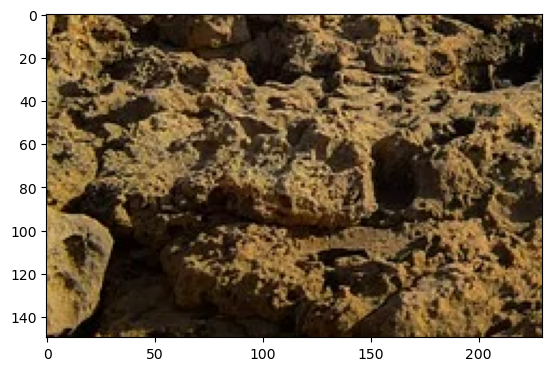

In [54]:
img_muestra = imgRGB[450:600,50:280,:]
plt.figure(2)
plt.imshow(img_muestra)
plt.show()

In [55]:
color_mean, color_std = cv.meanStdDev(img_muestra)

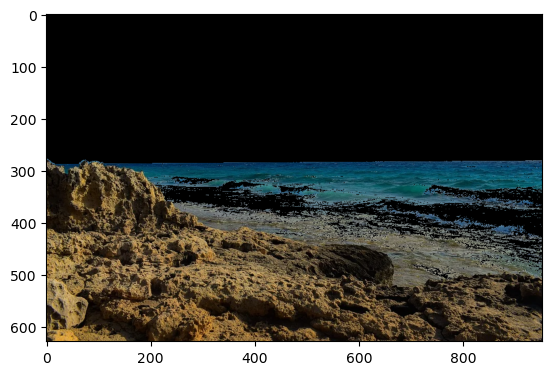

<function matplotlib.pyplot.show(close=None, block=None)>

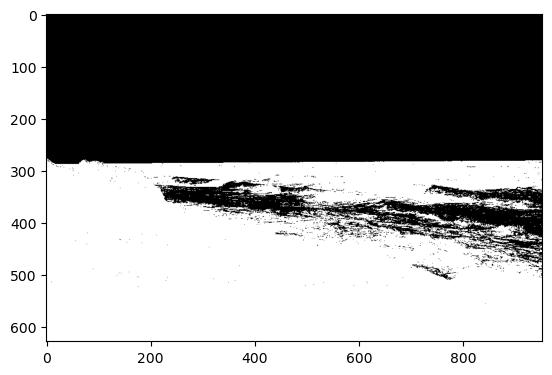

In [56]:
# Pintemos de blanco los puntos que estén cerca de la media en un radio menor que 3 sigmas
# para ¨capturar¨ el 99.7 % de pixeles.
n_sigma = 3
mask = cv.inRange(imgRGB, color_mean-color_std * n_sigma,  color_mean+color_std * n_sigma)
img_segmentada = cv.bitwise_and(imgRGB, imgRGB, mask=mask)

plt.figure(3)
plt.imshow(img_segmentada)
plt.show()

plt.figure(4)
plt.imshow(mask,cmap='gray')
plt.show

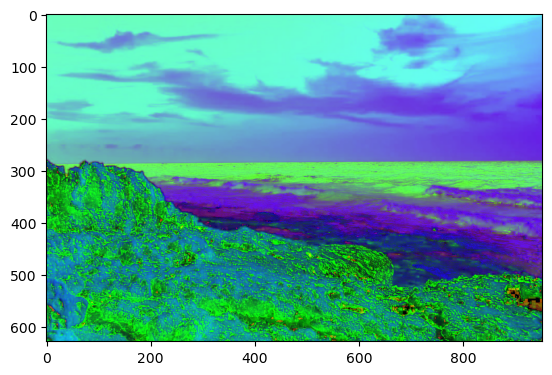

In [57]:
# Pasamos la imagen a HSV y calculo el color de muestra

img_HSV = cv.cvtColor(img_color, cv.COLOR_BGR2HSV)
plt.figure(5)
plt.imshow(img_HSV)

img_muestra_hsv = img_HSV[230:280,230:280,:]

color_mean = cv.mean(img_muestra_hsv)

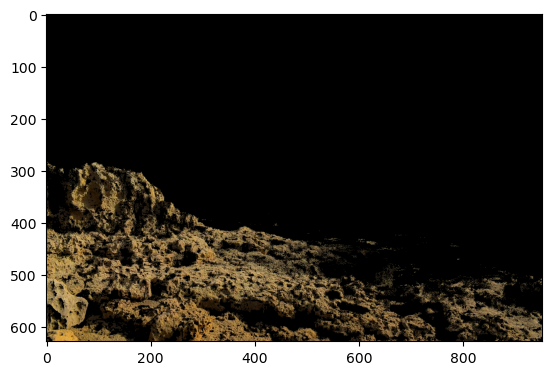

In [58]:
color_l = (14,80,30)
color_u = (24,255,255)

mask = cv.inRange(img_HSV, color_l,  color_u)
img_segmentada = cv.bitwise_and(imgRGB, imgRGB, mask=mask)

plt.figure(6)
plt.imshow(img_segmentada)
plt.show()